In [72]:
import os
import torch as tc
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split

# Dowloading and extracting the dataset

In [73]:
try:
    if(not os.path.exists('./cifar10')):
        dataset_url = "https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz"
        download_url(dataset_url, '.')
        with tarfile.open('./cifar10.tgz', 'r:gz') as tar:
            tar.extractall(path='./data')
    else:
        print('Dataset already downloaded')
except:
    print('Error while downloading the dataset')

Using downloaded and verified file: .\cifar10.tgz


In [74]:
print(len(os.listdir('./data/cifar10/train')))

10


In [75]:
data_dir = './data/cifar10'
classes = os.listdir(data_dir + "/train")
print(classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [76]:
print('Number of training images of airplane: ', len(os.listdir(data_dir + "/train/airplane")))

Number of training images of airplane:  5000


In [77]:
print('Number of test images of airplane: ', len(os.listdir(data_dir + "/test/airplane")))

Number of test images of airplane:  1000


In [78]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [79]:
train = ImageFolder(data_dir+'/train', transform=ToTensor())
test = ImageFolder(data_dir+'/test', transform=ToTensor())
train

Dataset ImageFolder
    Number of datapoints: 50000
    Root location: ./data/cifar10/train
    StandardTransform
Transform: ToTensor()

Thus, there are 10 classes inside train folder where each class consist of 5000 images while test consist of only 10000 images.  

In [80]:
train[0]

(tensor([[[0.7922, 0.7922, 0.8000,  ..., 0.8118, 0.8039, 0.7961],
          [0.8078, 0.8078, 0.8118,  ..., 0.8235, 0.8157, 0.8078],
          [0.8235, 0.8275, 0.8314,  ..., 0.8392, 0.8314, 0.8235],
          ...,
          [0.8549, 0.8235, 0.7608,  ..., 0.9529, 0.9569, 0.9529],
          [0.8588, 0.8510, 0.8471,  ..., 0.9451, 0.9451, 0.9451],
          [0.8510, 0.8471, 0.8510,  ..., 0.9373, 0.9373, 0.9412]],
 
         [[0.8000, 0.8000, 0.8078,  ..., 0.8157, 0.8078, 0.8000],
          [0.8157, 0.8157, 0.8196,  ..., 0.8275, 0.8196, 0.8118],
          [0.8314, 0.8353, 0.8392,  ..., 0.8392, 0.8353, 0.8275],
          ...,
          [0.8510, 0.8196, 0.7608,  ..., 0.9490, 0.9490, 0.9529],
          [0.8549, 0.8471, 0.8471,  ..., 0.9412, 0.9412, 0.9412],
          [0.8471, 0.8431, 0.8471,  ..., 0.9333, 0.9333, 0.9333]],
 
         [[0.7804, 0.7804, 0.7882,  ..., 0.7843, 0.7804, 0.7765],
          [0.7961, 0.7961, 0.8000,  ..., 0.8039, 0.7961, 0.7882],
          [0.8118, 0.8157, 0.8235,  ...,

# Making batches of 128 for train and 256 for test set

In [81]:
trainset = tc.utils.data.DataLoader(train, batch_size=128, shuffle=True)
testset = tc.utils.data.DataLoader(test, batch_size=128*2, shuffle=True)

In [82]:
trainset

In [83]:
for data in trainset:
    print(data)
    break

[tensor([[[[0.3922, 0.3490, 0.3216,  ..., 0.2510, 0.2510, 0.2314],
          [0.3647, 0.3255, 0.3333,  ..., 0.2627, 0.2549, 0.2353],
          [0.3412, 0.3294, 0.3569,  ..., 0.2706, 0.2588, 0.2392],
          ...,
          [0.2706, 0.2706, 0.2706,  ..., 0.2667, 0.2588, 0.2510],
          [0.2667, 0.2667, 0.2667,  ..., 0.2627, 0.2549, 0.2471],
          [0.2588, 0.2588, 0.2627,  ..., 0.2588, 0.2510, 0.2431]],

         [[0.4980, 0.4627, 0.4431,  ..., 0.4078, 0.4078, 0.3882],
          [0.4706, 0.4353, 0.4510,  ..., 0.4196, 0.4118, 0.3922],
          [0.4392, 0.4392, 0.4706,  ..., 0.4275, 0.4157, 0.3961],
          ...,
          [0.4353, 0.4392, 0.4471,  ..., 0.4431, 0.4353, 0.4275],
          [0.4353, 0.4392, 0.4431,  ..., 0.4392, 0.4314, 0.4235],
          [0.4275, 0.4314, 0.4392,  ..., 0.4353, 0.4275, 0.4196]],

         [[0.5843, 0.5529, 0.5412,  ..., 0.5490, 0.5490, 0.5333],
          [0.5569, 0.5216, 0.5451,  ..., 0.5608, 0.5529, 0.5373],
          [0.5176, 0.5216, 0.5608,  ..., 

In [84]:
# Output labels for a single batch
data[1]

tensor([0, 1, 2, 5, 7, 7, 6, 5, 8, 3, 5, 6, 1, 1, 2, 2, 5, 9, 5, 7, 4, 7, 8, 6,
        7, 5, 4, 2, 4, 0, 7, 5, 5, 6, 1, 9, 5, 0, 9, 6, 3, 7, 8, 6, 2, 6, 8, 5,
        0, 8, 6, 0, 0, 7, 8, 7, 0, 1, 4, 4, 6, 0, 2, 0, 1, 2, 7, 1, 7, 3, 5, 5,
        1, 0, 1, 3, 8, 0, 5, 2, 0, 9, 2, 9, 2, 8, 0, 2, 8, 5, 3, 7, 6, 9, 6, 2,
        2, 4, 5, 2, 6, 6, 6, 0, 1, 3, 0, 4, 0, 9, 7, 9, 6, 8, 4, 1, 7, 2, 9, 1,
        5, 4, 4, 8, 8, 4, 2, 6])

# plotting a sample image

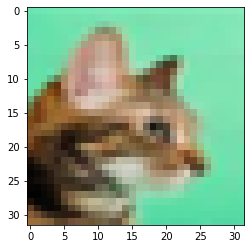

In [85]:
import matplotlib.pyplot as plt
plt.imshow(data[0][9].permute(1,2,0))
plt.show()

# Making the convnet

In [86]:
import torch as tc
import torch.nn as nn
import torch.nn.functional as F

In [87]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3,32,kernel_size=3,padding=1)
        self.conv2 = nn.Conv2d(32,64,kernel_size=3,stride=1,padding=1)
        self.conv3 = nn.Conv2d(64,128,kernel_size=3,stride=1,padding=1)
        self.conv4 = nn.Conv2d(128,128,kernel_size=3,stride=1,padding=1)
        self.conv5 = nn.Conv2d(128,256,kernel_size=3,stride=1,padding=1)
        self.conv6 = nn.Conv2d(256,256,kernel_size=3,stride=1,padding=1)

        x = tc.randn(3,32,32).view(-1,3,32,32)
        self._to_linear = None
        self.convs(x)

        self.fc1 = nn.Linear(self._to_linear,1024)
        self.fc2 = nn.Linear(1024,512)
        self.fc3 = nn.Linear(512,10)
    
    # to get the shape for flattening
    def convs(self,x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(F.relu(self.conv2(x)),(2,2))
        x = F.relu(self.conv3(x))
        x = F.max_pool2d(F.relu(self.conv4(x)),(2,2))
        x = F.relu(self.conv5(x))
        x = F.max_pool2d(F.relu(self.conv6(x)),(2,2))

        if self._to_linear == None:
            self._to_linear = x[0].shape[0]*x[0].shape[1]*x[0].shape[2]
        return x

    # feed forward layer
    def forward(self,x):
        x = self.convs(x)
        x = x.view(-1,self._to_linear)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return x

net = CNN()
print(net)

CNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv6): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=4096, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
)


# Defining optimizer and loss function

In [88]:
import torch.optim as optim
Epochs = 6

optimizer = optim.Adam(net.parameters(),lr=0.001)

for epoch in range(Epochs):
    for data in trainset:
        x, y = data[0],data[1]

        # assigning weights to be zero
        net.zero_grad()
        outputs = net(x)
        loss = F.cross_entropy(outputs,y)
        loss.backward()
        optimizer.step()
    
    print(f'Epoch : {epoch}, Loss : {loss}')

Epoch : 0, Loss : 2.378924608230591
Epoch : 1, Loss : 1.8648672103881836
Epoch : 2, Loss : 1.228666067123413
Epoch : 3, Loss : 1.7016971111297607
Epoch : 4, Loss : 1.1415678262710571
Epoch : 5, Loss : 1.1171096563339233


# Testing the model

In [89]:
correct = 0
total = 0

with tc.no_grad():
    for data in testset:
        i = 0
        x, y = data[0],data[1]
        outputs = net(x)[i]
        if(tc.argmax(outputs) == y[i]):
            correct += 1
        i+=1
        total += 1

print('Validation accuracy is given as : ',(correct/total))

Validation accuracy is given as :  0.7
